# Regression with a basic neural network

We will setup a one layer linear network for regression.

In [11]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), ".."))

In [12]:
from pyldl.losses import MSELoss
from pyldl.modules import Linear

In [13]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np

## Linear and MSELoss

In [14]:
linear = Linear(in_features=3, out_features=2)

parameters = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
linear._parameters = parameters

bias = np.array([0.95008842, -0.15135721])
linear._bias = bias

X = np.array([[1, 2, 3], [4, 5, 6]])

print("Parameters:")
print(linear._parameters)
print("\nBias:")
print(linear._bias)

output = linear.forward(X)
print("\nForward pass output:")
print(output)

delta = np.array([[1, 1], [1, 1]])
linear.zero_grad()
linear.backward_update_gradient(X, delta)
print("\nGradient after backward_update_gradient:")
print(linear._gradient)

d_out = linear.backward_delta(X, delta)
print("\nGradient w.r.t. input (backward_delta):")
print(d_out)

Parameters:
[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]]

Bias:
[ 0.95008842 -0.15135721]

Forward pass output:
[[3.15008842 2.64864279]
 [5.85008842 6.24864279]]

Gradient after backward_update_gradient:
[[5. 5.]
 [7. 7.]
 [9. 9.]]

Gradient w.r.t. input (backward_delta):
[[0.3 0.7 1.1]
 [0.3 0.7 1.1]]


In [15]:
y = np.array([[1, 0, 0], [0, 1, 0], [1, 1, 0]])
yhat = np.array([[0.8, 0.1, 0.1], [0.2, 0.5, 0.3], [0.9, 0.1, 0]])

mse_loss = MSELoss()

mse_loss_output = mse_loss.forward(y, yhat)
print("MSELoss forward output:", mse_loss_output)

mse_loss_gradient = mse_loss.backward(y, yhat)
print("MSELoss backward gradient:", mse_loss_gradient)

MSELoss forward output: 0.4200000000000001
MSELoss backward gradient: [[-0.4  0.2  0.2]
 [ 0.4 -1.   0.6]
 [-0.2 -1.8 -0. ]]


## Dataset and Network

In [16]:
np.random.seed(0)

In [17]:
X, y = make_regression(n_samples=1000, n_features=1, noise=1)
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
in_features = X_train.shape[1]
out_features = 1

network = Linear(in_features, out_features)
loss = MSELoss()

## Gradient Descent

In [19]:
def gradient_descent(X, y, n_iter=500, gradient_step=1e-4):
    losses = []
    for _ in tqdm(range(n_iter)):
        yhat = network.forward(X)
        losses.append(loss.forward(y, yhat).mean())
        delta = loss.backward(y, yhat)
        network.backward_update_gradient(X, delta)
        network.update_parameters(gradient_step)
        network.zero_grad()
    return losses

100%|██████████| 500/500 [00:00<00:00, 34003.83it/s]


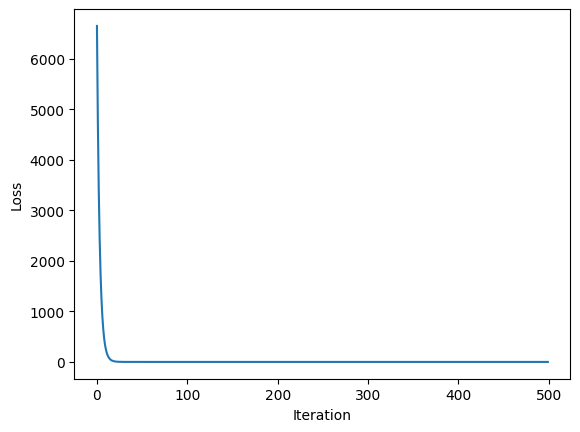

In [20]:
losses = gradient_descent(X_train, y_train)
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

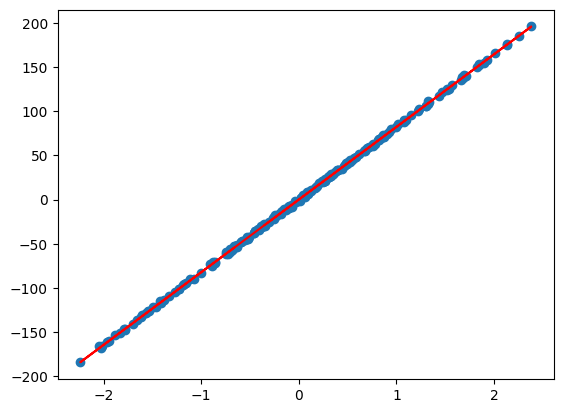

In [21]:
yhat = network.forward(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, yhat, color="red")
plt.show()